# Capstone: Visualizations

**San Francisco Police Department Incident Reports**

This notebook supports the visualizations for the final report of this Capstone Project. Please reference 
the [README.md](https://github.com/fazeelgm/UCB_ML_AI_Capstone/blob/main/README.md) 
for details.

## Imports & Utilities

### Imports

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import utilities
import time

# Export dataFrame's as images
import dataframe_image as dfi

# import project utils
import sys
sys.path.append('../src')

import data_utils
from data_utils import Config

In [6]:
# Configure logging
import logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# logging.getLogger().setLevel(logging.DEBUG)
# logging.getLogger().setLevel(logging.INFO)

### Utility Functions

In [8]:
def time_secs_to_msg(lapse_time_secs, mins_label='m', secs_label='s'):
    if lapse_time_secs <= 60:
        return f'{lapse_time_secs%60:.2f}{secs_label}'
    else:
        return f'{lapse_time_secs//60:,.0f}{mins_label} {lapse_time_secs%60:.2f}{secs_label}'

## The Data

Details for the data can be found in the project [README.md](https://github.com/fazeelgm/UCB_ML_AI_Capstone/blob/main/README.md).

### Read the Data

In [11]:
# Which dataset to work from? Select sample size percentage

# sample_file = data_utils.select_sample_csv_file(pct=10)
sample_file = data_utils.select_sample_csv_file(pct=100)
# sample_file = data_utils.select_sample_csv_file(pct=75)
# sample_file = data_utils.select_sample_csv_file(pct=50)
# sample_file = data_utils.select_sample_csv_file(pct=25)

print(f'Selected sample file: {sample_file}')

Selected sample file: ../data/incidents_clean.csv


In [12]:
current_raw_df, current_clean_df = data_utils.get_clean_data_from_csv(sample_file)

Reading file: ../data/incidents_clean.csv ... Done: 894,585 rows, 36 columns
... Converting datetime to timeseries ... Done
... Setting index to datetime ... Done
Done


### Apply Feature Engineering Learnings

We will re-use the learnings from the Exploratory Data Analysis (EDA) and apply it to clean the data using two shared methods:

* `data_utils.preprocess_data()`
* `data_utils.fix_data_artifacts()`
* `data_utils.apply_synthetic_features()`

Please refer to the EDA notebook, 
[ExploratoryDataAnalysis.ipynb](https://github.com/fazeelgm/UCB_ML_AI_Capstone/blob/main/notebooks/ExploratoryDataAnalysis.ipynb), for details.

In [15]:
data = data_utils.preprocess_data(current_raw_df.copy())

Pre-processing ... 
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column Unnamed: 0 not dropped: KeyError("['Unnamed: 0'] not found in axis")
... preprocess_drop_cols: Column esncag_-_boundary_file dropped
... preprocess_drop_cols: Column central_market/tenderloin_boundary_polygon_-_updated dropped
... preprocess_drop_cols: Column civic_center_harm_reduction_project_boundary dropped
... preprocess_drop_cols: Column hsoc_zones_as_of_2018-06-05 dropped
... preprocess_drop_cols: Column invest_in_neighborhoods_(iin)_areas dropped
... preprocess_drop_cols: Column report_type_code dropped
... preprocess_drop_cols: Column report_type_description dropped
... preprocess_drop_cols: Column filed_online dropped
... preprocess_drop_cols: Column intersection dropped
... preprocess_drop_cols: Column cnn dropped
... preprocess_drop_cols: Column point dropped
... preprocess_drop_cols: Column supervisor_district dropped
... preprocess_drop_cols: Column supervisor_district_2012 dropped
...

In [16]:
# Fix data value artifacts that were discovered during EDA
data = data_utils.fix_data_artifacts(data)

Fixing data artifacts (in-place) ... 
... Category column:
    ..."Human Trafficking*"
    ..."Motor Vehicle Theft"
    ..."Weapons Offence"
Done


Create the new, synthetic features that were introduced during EDA:

In [18]:
data = data_utils.apply_synthetic_features(data)

Generating synthetic feature columns (in-place) ... 
... Adding columns ['hour', 'minute', 'day', 'month']'
... Adding column ['weekend']
... Adding column ['season']
... Adding column ['holiday']
... Adding column ['tod']
Done


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 829328 entries, 2023-03-11 14:00:00 to 2023-03-21 17:42:00
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             829328 non-null  object 
 1   time             829328 non-null  object 
 2   year             829328 non-null  int64  
 3   dow              829328 non-null  object 
 4   category         829328 non-null  object 
 5   resolution       829328 non-null  object 
 6   police_district  829328 non-null  object 
 7   neighborhood     829328 non-null  object 
 8   latitude         829328 non-null  float64
 9   longitude        829328 non-null  float64
 10  hour             829328 non-null  int64  
 11  minute           829328 non-null  int64  
 12  day              829328 non-null  int64  
 13  month            829328 non-null  int64  
 14  weekend          829328 non-null  int64  
 15  season           829328 non-null  object 
 16  holi

In [20]:
data.head(2)

,date,time,year,dow,category,resolution,police_district,neighborhood,latitude,longitude,hour,minute,day,month,weekend,season,holiday,tod
datetime,,,,,,,,,,,,,,,,,,
2023-03-11 14:00:00,2023/03/11,14:00,2023,Saturday,Assault,Open or Active,Park,Golden Gate Park,37.772895,-122.454285,14,0,11,3,1,Spring,False,Afternoon
2022-06-27 12:00:00,2022/06/27,12:00,2022,Monday,Lost Property,Open or Active,Central,Financial District/South Beach,37.787359,-122.408227,12,0,27,6,0,Summer,False,Afternoon


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 829328 entries, 2023-03-11 14:00:00 to 2023-03-21 17:42:00
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             829328 non-null  object 
 1   time             829328 non-null  object 
 2   year             829328 non-null  int64  
 3   dow              829328 non-null  object 
 4   category         829328 non-null  object 
 5   resolution       829328 non-null  object 
 6   police_district  829328 non-null  object 
 7   neighborhood     829328 non-null  object 
 8   latitude         829328 non-null  float64
 9   longitude        829328 non-null  float64
 10  hour             829328 non-null  int64  
 11  minute           829328 non-null  int64  
 12  day              829328 non-null  int64  
 13  month            829328 non-null  int64  
 14  weekend          829328 non-null  int64  
 15  season           829328 non-null  object 
 16  holi

In [22]:
# data.to_csv('../data/incidents_10.csv')

## Load Models

In [24]:
import datetime
import joblib

In [25]:
# To load the saved models:
# 1. Read the appropriate sample file - see READ DATA section above
# 2. Edit the model file prefix and suffix for the models you want loaded
#
# Paste the name of the saved models file here and update the prefix / suffix to load PKL
# PKL file run: saved_XGBClassifier_incidents_clean_2024-10-12_0243.pkl  # default datestamp to use

timestamp_prefix = 'saved_'
timestamp_suffix = '_incidents_clean_10_pct_2024-10-11_1510.pkl'

saved_models = {
    'RandomForestClassifier',
    'XGBClassifier',
    # 'TEST_FAILURE'
}

loaded_models = {}
for model in saved_models:
    print(f'Loading models ...')
    
    try:
        saved_file = Config.MODELS_DIR / f'{timestamp_prefix}{model}{timestamp_suffix}'
        print(f'... Loading {model} from {saved_file}')
        loaded_models[model] = joblib.load(saved_file)
    except:
        print(f'... FAILED {model}: {repr(sys.exception())}')

print(f'Done')

Loading models ...
... Loading RandomForestClassifier from ../models/saved_RandomForestClassifier_incidents_clean_10_pct_2024-10-11_1510.pkl
Loading models ...
... Loading XGBClassifier from ../models/saved_XGBClassifier_incidents_clean_10_pct_2024-10-11_1510.pkl
Done


In [26]:
loaded_models

{'RandomForestClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=0.8390144719977516, colsample_bynode=None,
               colsample_bytree=0.9416576386904312, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.02806554771929606,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=95, max_leaves=None,
               min_child_weight=9, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=109, n_jobs=None,
               num_parallel_tree=None, objective='multi:softprob', ...),
 'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=0.8390144719977516, colsample_b

## Data Preparation

### Encode the Data

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
enc_dow = LabelEncoder()
enc_dow.fit(data.dow.unique())
data['dow'] = enc_dow.transform(data.dow)

In [31]:
# Create mask for seasons
seasons = {0:'Winter', 1:'Spring', 2:'Summer', 3:'Fall'}

data['season'] = data.month.map(lambda x: seasons[((x % 12) // 3)])

# data[['month', 'season']].head(5)

In [32]:
enc_season = LabelEncoder()
enc_season.fit(data.season.unique())
data['season'] = enc_season.transform(data.season)

# data[['month', 'season']].head(5)

In [33]:
drop_encoded_cols = ['date', 'time']

In [34]:
enc_tod = LabelEncoder()
enc_tod.fit(data.tod.unique())
data['tod'] = enc_tod.transform(data.tod)

# data[['hour', 'tod']].head(5)

In [35]:
drop_encoded_cols.append('resolution')

In [36]:
enc_cat = LabelEncoder()
enc_cat.fit(data.category.unique())
data.category = enc_cat.transform(data.category)

In [37]:
enc_pd = LabelEncoder()
enc_pd.fit(data.police_district.unique())
data['pd'] = enc_pd.transform(data.police_district)

In [38]:
enc_hood = LabelEncoder()
enc_hood.fit(data.neighborhood.unique())
data.neighborhood = enc_hood.transform(data.neighborhood)

In [39]:
drop_encoded_cols.append('police_district')

print(f'Dropping encoded columns: {drop_encoded_cols}')
data.drop(columns=drop_encoded_cols, inplace=True)

Dropping encoded columns: ['date', 'time', 'resolution', 'police_district']


### Create Train/Test Splits

In [41]:
X = data.drop('category', axis='columns')
y = data['category']

In [42]:
# OneHot Encode the features and drop the first value to reduce multicollinearity
X = pd.get_dummies(X, drop_first=True)

In [43]:
# Consistent random_state for the project
print(f'Project-wide random_state: {Config.RANDOM_STATE}')

Project-wide random_state: 42


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=Config.RANDOM_STATE)

In [45]:
print('AFTER TRAIN_TEST_SPLIT: Data{}, X_train{}, X_test{}, y_train{}, y_test{}'
      .format(data.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape))

AFTER TRAIN_TEST_SPLIT: Data(829328, 15), X_train(663462, 14), X_test(165866, 14), y_train(663462,), y_test(165866,)


In [46]:
# spot-check feature encoding
X.T.iloc[:, 0:5]

datetime,2023-03-11 14:00:00,2022-06-27 12:00:00,2023-03-16 17:30:00,2023-03-21 15:50:00,2021-08-22 09:40:00
year,2023,2022,2023,2023,2021
dow,2,1,4,5,3
neighborhood,7,5,28,35,26
latitude,37.772895,37.787359,37.76229,37.787038,37.793977
longitude,-122.454285,-122.408227,-122.401324,-122.418271,-122.429804
hour,14,12,17,15,9
minute,0,0,30,50,40
day,11,27,16,21,22
month,3,6,3,3,8
weekend,1,0,0,0,1


### Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

# Scale the data - we'll use StandardScaler for the baseline model
logging.debug('Scaling data')
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('AFTER SCALING: Data{}, X_train_scaled{}, X_test_scaled{}, y_train{}, y_test{}'
      .format(data.shape, X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape))

AFTER SCALING: Data(829328, 15), X_train_scaled(663462, 14), X_test_scaled(165866, 14), y_train(663462,), y_test(165866,)


## Evaluation

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve

In [51]:
%%time

clf_name = 'XGBClassifier'
clf = loaded_models[clf_name]

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 11 µs


In [52]:
target_names = np.unique(enc_cat.inverse_transform(data.category))

In [53]:
y_preds = clf.predict(X_test_scaled)
y_probs_full = clf.predict_proba(X_test_scaled)
y_probs = y_probs_full[:, 1]

class_report = classification_report(y_test, y_preds, target_names=target_names)
print(f'\n{clf_name}: Classifiction Report:\n\n{class_report}')


XGBClassifier: Classifiction Report:

                                          precision    recall  f1-score   support

                                   Arson       0.00      0.00      0.00       511
                                 Assault       0.17      0.12      0.14     10974
                                Burglary       0.25      0.14      0.18      9827
                            Case Closure       0.00      0.00      0.00       369
                         Civil Sidewalks       0.27      0.28      0.28       177
                         Courtesy Report       0.00      0.00      0.00       154
                      Disorderly Conduct       0.25      0.01      0.01      3057
                            Drug Offense       0.35      0.37      0.36      4545
                          Drug Violation       0.00      0.00      0.00        57
                            Embezzlement       0.00      0.00      0.00       210
                             Fire Report       0.00      0

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


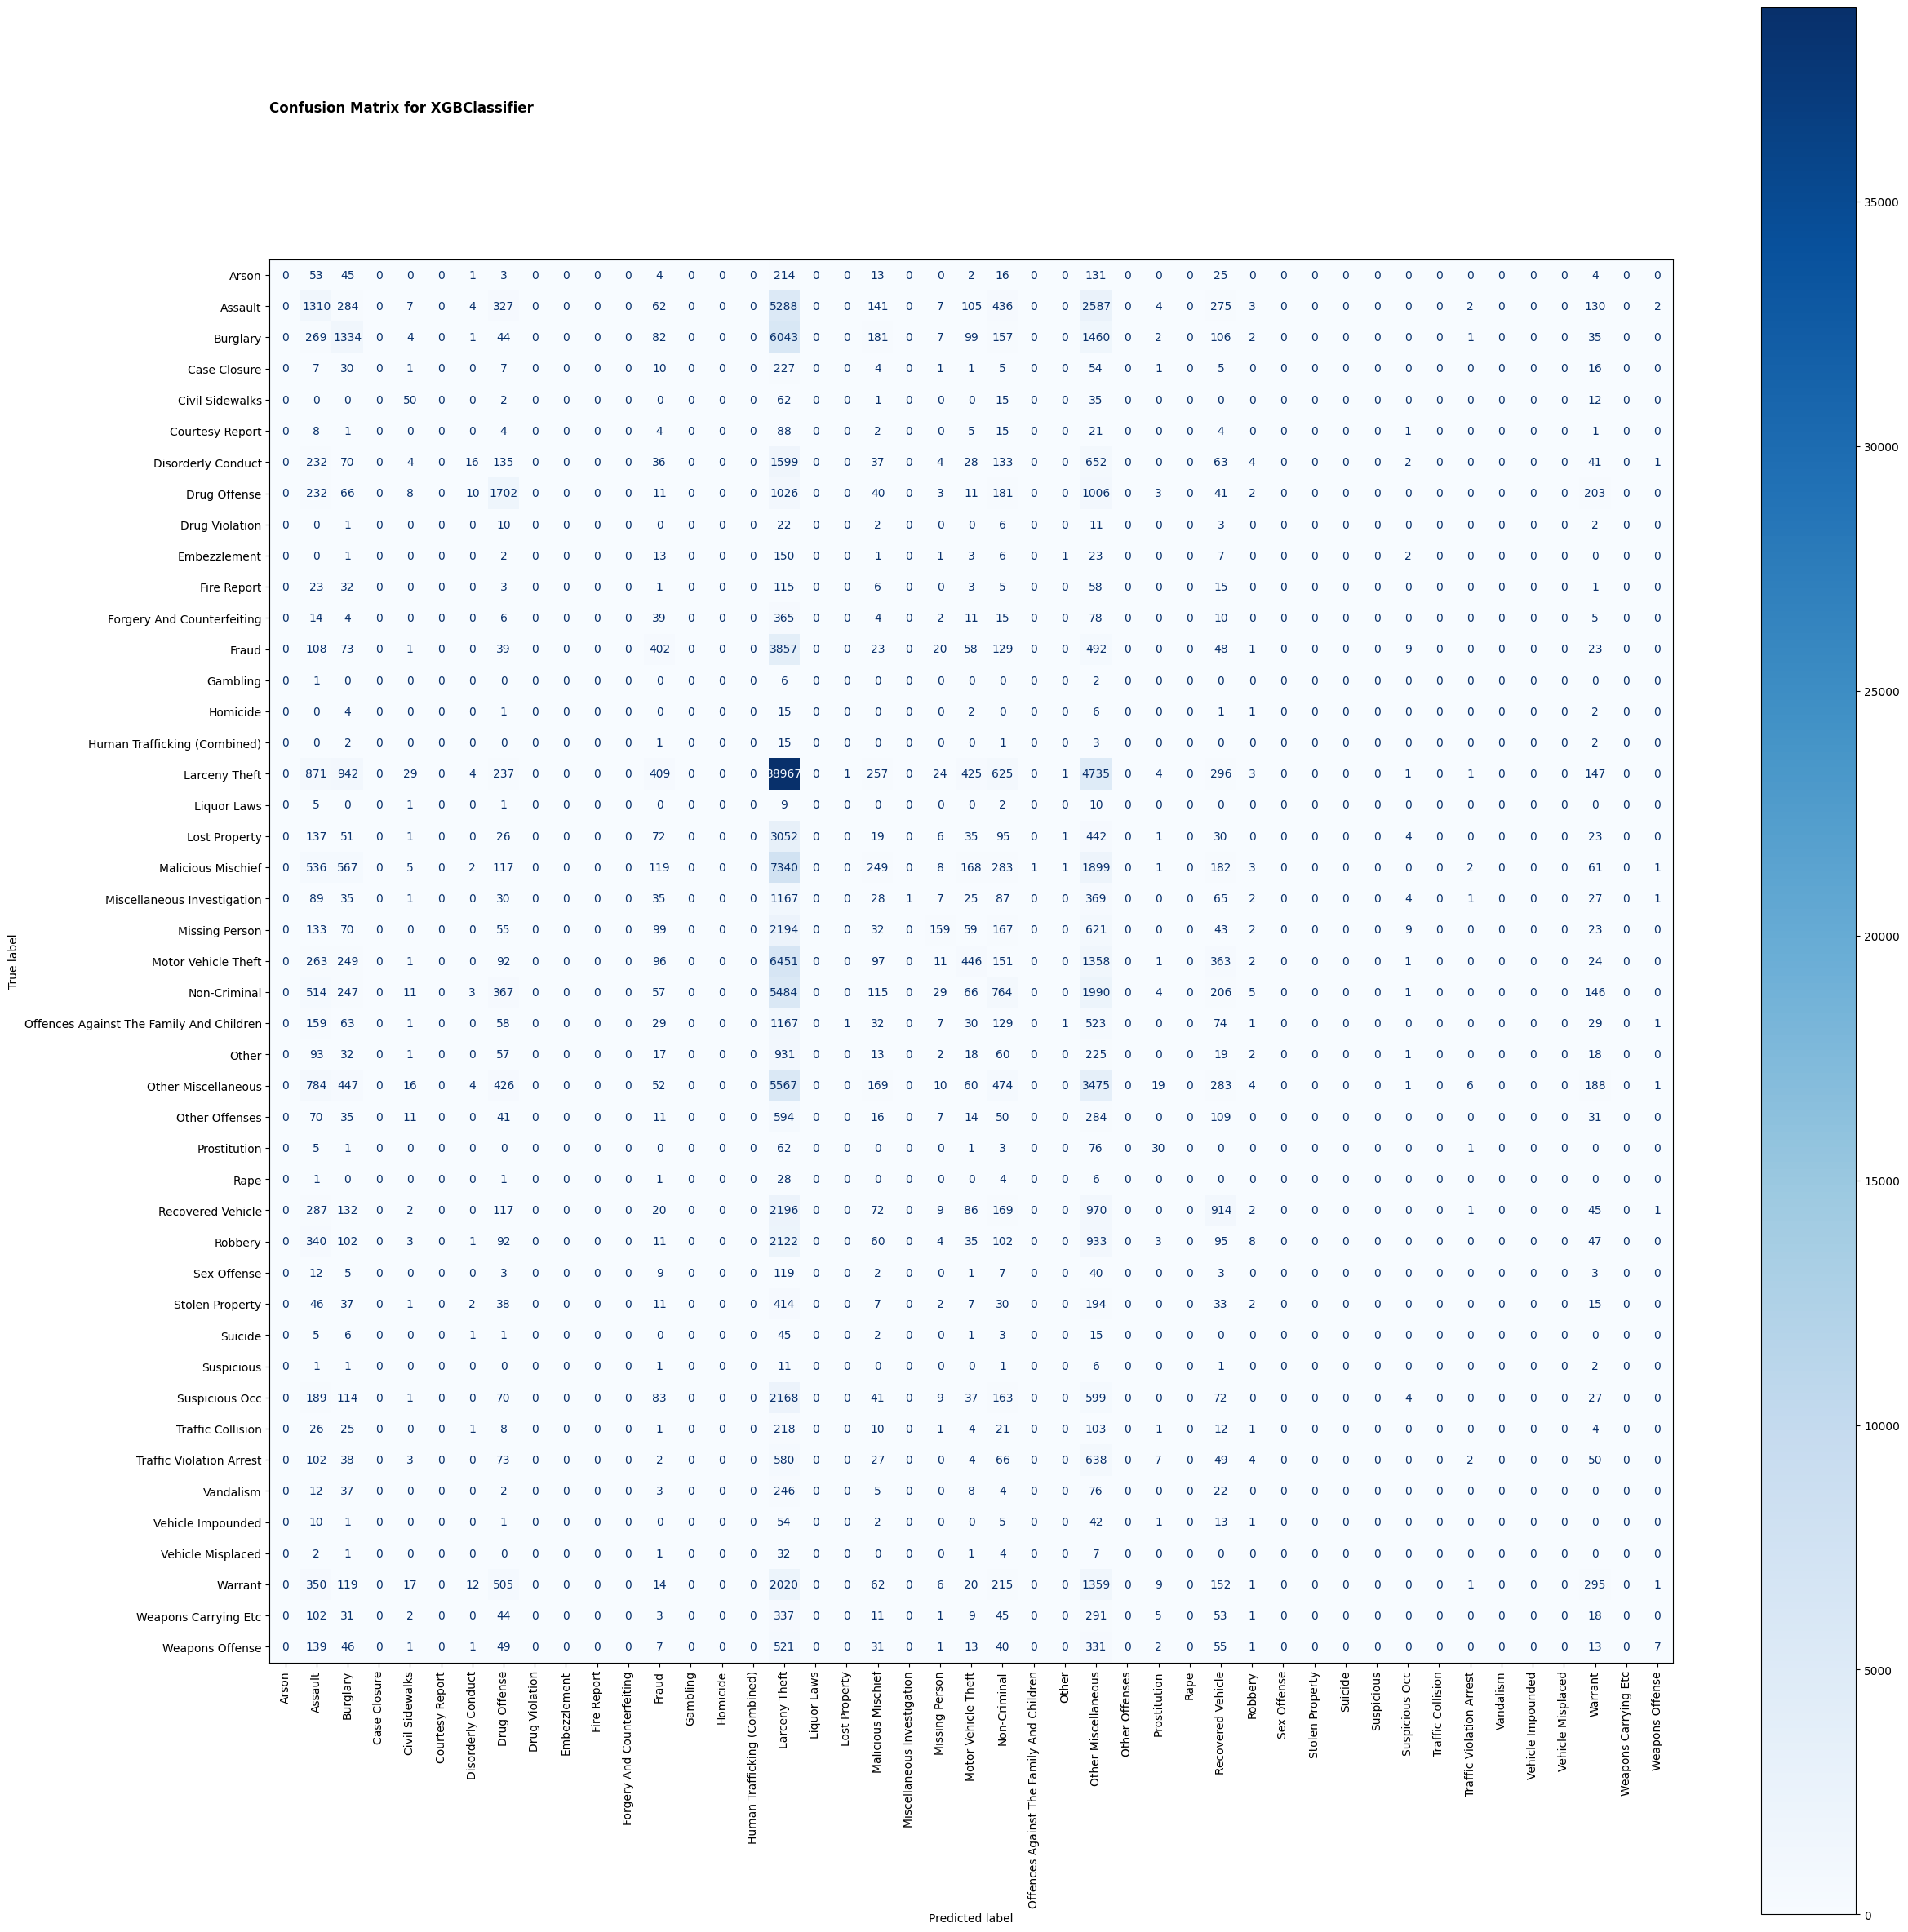

In [54]:
cm = confusion_matrix(y_test, y_preds)

# Generate the confusion matrix
fig, ax = plt.subplots(figsize=(25, 25))
# disp.plot(ax=ax)
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, ax=ax, cmap=plt.cm.Blues,
                                        display_labels=target_names, xticks_rotation='vertical')
plt.tight_layout()
ax.set_title(f'Confusion Matrix for {clf_name}', loc="left", fontdict={"weight": "bold"}, y=1.1)
# plt.savefig(Config.IMAGE_DIR / f'Confusion_matrix_{name}.png')
plt.show()

## SHAP

In [56]:
import shap

In [57]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165866 entries, 2019-10-24 11:00:00 to 2023-11-29 01:33:00
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          165866 non-null  int64  
 1   dow           165866 non-null  int64  
 2   neighborhood  165866 non-null  int64  
 3   latitude      165866 non-null  float64
 4   longitude     165866 non-null  float64
 5   hour          165866 non-null  int64  
 6   minute        165866 non-null  int64  
 7   day           165866 non-null  int64  
 8   month         165866 non-null  int64  
 9   weekend       165866 non-null  int64  
 10  season        165866 non-null  int64  
 11  holiday       165866 non-null  bool   
 12  tod           165866 non-null  int64  
 13  pd            165866 non-null  int64  
dtypes: bool(1), float64(2), int64(11)
memory usage: 17.9 MB


In [58]:
# X_test_copy = X_test.copy()
# X_test_copy.reset_index(inplace=True)
# X_test_copy.drop(columns='datetime', inplace=True)
# X_test_copy.info()

In [59]:
# sample = pd.DataFrame(data=X_test_copy.iloc[0].to_dict(), index=range(1))
# sample

In [60]:
loaded_models.keys()

dict_keys(['RandomForestClassifier', 'XGBClassifier'])

In [61]:
%%time
# Select model to SHAP
# model = loaded_models['RandomForestClassifier']
model = loaded_models['XGBClassifier']

CPU times: user 10 µs, sys: 5 µs, total: 15 µs
Wall time: 10 µs


In [62]:
%%time
# explainer = shap.TreeExplainer(model)
explainer = shap.TreeExplainer(model, feature_names=target_names)
# explainer = shap.Explainer(model, feature_names=target_names)

CPU times: user 4.65 s, sys: 670 ms, total: 5.32 s
Wall time: 6.06 s


In [63]:
# Create a sample set of the first n test values
sample_first_20 = X_test.iloc[0:20]

In [64]:
%%time

# Get SHAP values for the first 20 test samples

# shap_values = explainer.shap_values(X_test)
shap_values = explainer.shap_values(sample_first_20)

CPU times: user 5.92 s, sys: 58 ms, total: 5.98 s
Wall time: 2.04 s


In [65]:
%%time

# Let's look at first sample

# shap.force_plot(exp.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0][:,0], features=X_train.columns)

CPU times: user 697 µs, sys: 188 µs, total: 885 µs
Wall time: 593 µs


In [66]:
np.shape(shap_values)

(20, 14, 45)

In [67]:
%%time

# Let's look at last sample
shap.force_plot(explainer.expected_value[-1], shap_values[-1][:,0], features=X_train.columns)

CPU times: user 369 µs, sys: 9 µs, total: 378 µs
Wall time: 414 µs


In [68]:
%%time

# Let's look at all the 20 samples together

shap.force_plot(explainer.expected_value[0], shap_values[:,0], feature_names=X_train.columns, )

CPU times: user 13.2 ms, sys: 3.09 ms, total: 16.3 ms
Wall time: 10.8 ms


In [69]:
for col in zip(range(len(target_names)), target_names):
    print (col)

(0, 'Arson')
(1, 'Assault')
(2, 'Burglary')
(3, 'Case Closure')
(4, 'Civil Sidewalks')
(5, 'Courtesy Report')
(6, 'Disorderly Conduct')
(7, 'Drug Offense')
(8, 'Drug Violation')
(9, 'Embezzlement')
(10, 'Fire Report')
(11, 'Forgery And Counterfeiting')
(12, 'Fraud')
(13, 'Gambling')
(14, 'Homicide')
(15, 'Human Trafficking (Combined)')
(16, 'Larceny Theft')
(17, 'Liquor Laws')
(18, 'Lost Property')
(19, 'Malicious Mischief')
(20, 'Miscellaneous Investigation')
(21, 'Missing Person')
(22, 'Motor Vehicle Theft')
(23, 'Non-Criminal')
(24, 'Offences Against The Family And Children')
(25, 'Other')
(26, 'Other Miscellaneous')
(27, 'Other Offenses')
(28, 'Prostitution')
(29, 'Rape')
(30, 'Recovered Vehicle')
(31, 'Robbery')
(32, 'Sex Offense')
(33, 'Stolen Property')
(34, 'Suicide')
(35, 'Suspicious')
(36, 'Suspicious Occ')
(37, 'Traffic Collision')
(38, 'Traffic Violation Arrest')
(39, 'Vandalism')
(40, 'Vehicle Impounded')
(41, 'Vehicle Misplaced')
(42, 'Warrant')
(43, 'Weapons Carrying Etc

In [70]:
# Create a sample set of just Larceny Theft

sample_larceny = X_test.loc[y_test == 16]

In [71]:
# n = 20
n = int(len(sample_larceny) * 0.05)   # 5%
# n = len(sample_larceny)            # All

print(f'Sample size for Larceny: {n}')

Sample size for Larceny: 2398


In [72]:
%%time

# Get SHAP values for the first n test samples

# shap_values = explainer.shap_values(X_test)
shap_values = explainer.shap_values(sample_larceny.head(n))

CPU times: user 11min 37s, sys: 4.89 s, total: 11min 42s
Wall time: 4min 20s


In [139]:
%%time

# Let's look at first sample

# shap.force_plot(exp.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0][:,0], features=X_train.columns)

CPU times: user 1.36 ms, sys: 23.6 ms, total: 25 ms
Wall time: 61.7 ms


In [73]:
%%time

# Let's look at all the 20 samples together

# shap.force_plot(exp.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[:,0], features=X_train.columns)#, feature_names=target_names)#, feature_names=X_train.columns)

CPU times: user 14.4 s, sys: 397 ms, total: 14.8 s
Wall time: 20.5 s
